# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house. 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

# Business Goal  

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

import os

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 500

### Data Dictionary

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [3]:
# importing the data.

data = pd.read_csv("train.csv")

In [4]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [5]:
# Shape of the Dataset
data.shape

(1460, 81)

In [6]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see there are many NaN values present in the dataset so we need to treat them. From the above data we can also see that there are columns which have null values more than 50%, dropping those. But I am not dropping those columns where NA has a value of a quality, I will replace them with 0 in this section

#### Understanding the Data Dictionary and dealing with NaN values

The data dictionary contains the meaning of various attributes, it helped us in dealing with the NaN values.

In [7]:
data.drop(columns =["Alley", "Id", "GarageYrBlt"], inplace = True)

# Here Id is dropped because its of no use, we can use index instead of that column. I have
# also dropped GarageYrBlt and Alley as they are of very little significance.

In [8]:
# Let's treat the below mentioned variables to numeric and some to binary.

var =  ['ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'PavedDrive']

# Defining the map function
def num_map(x):
    return x.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Y': 1, 'N': 0, 'NA': 0})

# Applying the function to the housing list
data[var] = data[var].apply(num_map)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [10]:
# Lets fill the LotFrontage column with the median value of the column.
x = data['LotFrontage'].median()
data['LotFrontage'].fillna(x, inplace=True)

In [11]:
# Lets check the value counts of the columns with Nan Values.
data['MasVnrType'].fillna('None', inplace=True)
data['MasVnrType'].astype('category').value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
# MasVnrArea
data['MasVnrArea'].fillna('0.0', inplace=True)
data['MasVnrArea'].astype('category').value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
0.0         8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
170.0       5
84.0        5
168.0       4
76.0        4
336.0       4
100.0       4
300.0       4
288.0       4
270.0       4
268.0       4
246.0       4
160.0       4
183.0       4
178.0       4
196.0       4
210.0       4
216.0       4
220.0       4
456.0       4
252.0       4
40.0        4
174.0       3
116.0       3
99.0        3
208.0       3
256.0       3
104.0       3
110.0       3
272.0       3
90.0        3
420.0       3
186.0       3
148.0       3
128.0       3
130.0       3
226.0       3
166.0       3
350.0       3
240.0       3
145.0       3
176.0       3
312.0       3
169.0       3
136.0       3
44.0        3
42.0        3
50.0        3
85.0        3
70.0        3
82.0        3
74.0        3
480.0       2
289.0       2
650.0       2
164.0       2
162.0       2
281.0       2
284.0 

In [13]:
# BsmtQual
data['BsmtQual'].fillna('0.0', inplace=True)
data['BsmtQual'].astype('category').value_counts()

3.0    649
4.0    618
5.0    121
0.0     37
2.0     35
Name: BsmtQual, dtype: int64

In [14]:
# BsmtCond
data['BsmtCond'].fillna('0.0', inplace=True)
data['BsmtCond'].astype('category').value_counts()

3.0    1311
4.0      65
2.0      45
0.0      37
1.0       2
Name: BsmtCond, dtype: int64

In [15]:
# BsmtExposure
data['BsmtExposure'].fillna('No', inplace=True)
data['BsmtExposure'].astype('category').value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [16]:
# BsmtFinType1
data['BsmtFinType1'].fillna('NA', inplace=True)
data['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [17]:
# BsmtFinType2
data['BsmtFinType2'].fillna('NA', inplace=True)
data['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [18]:
# Electrical
data['Electrical'].fillna('NA', inplace=True)
data['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
NA          1
Mix         1
Name: Electrical, dtype: int64

In [19]:
#FireplaceQu
data['FireplaceQu'].fillna('0', inplace=True)
data['FireplaceQu'].astype('category').value_counts()

0      690
4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

In [20]:
# GarageType
data['GarageType'].fillna('NA', inplace=True)
data['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
# GarageFinish
data['GarageFinish'].fillna('NA', inplace=True)
data['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

In [22]:
# GarageQual
data['GarageQual'].fillna('0.0', inplace=True)
data['GarageQual'].astype('category').value_counts()

3.0    1311
0.0      81
2.0      48
4.0      14
5.0       3
1.0       3
Name: GarageQual, dtype: int64

In [23]:
# GarageCond
data['GarageCond'].fillna('0.0', inplace=True)
data['GarageCond'].astype('category').value_counts()

3.0    1326
0.0      81
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

In [24]:
# PavedDrive
data['PavedDrive'].fillna('0.0', inplace=True)
data['PavedDrive'].astype('category').value_counts()

1.0    1340
0.0      90
0.0      30
Name: PavedDrive, dtype: int64

In [25]:
# PoolQC
data['PoolQC'].fillna('0.0', inplace=True)
data['PoolQC'].astype('category').value_counts()

0.0    1453
4.0       3
5.0       2
2.0       2
Name: PoolQC, dtype: int64

In [26]:
# Fence
data['Fence'].fillna('NA', inplace=True)
data['Fence'].astype('category').value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [27]:
# MiscFeature
data['MiscFeature'].fillna('NA', inplace=True)
data['MiscFeature'].astype('category').value_counts()

NA      1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [28]:
# BldgType
data['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [29]:
# HouseStyle
data['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [30]:
# Creating the column "age", it will tell us the age of the house.
import datetime
now = datetime.datetime.now()
cur_yr = now.year
data['CurYr'] = cur_yr
data['age'] = data['CurYr'] - data['YearBuilt']

# Dropping the irrelevant variables.
data = data.drop(['CurYr', 'YearBuilt'], axis=1)

In [31]:
# Creating the column "ReModAge", it will tell us the age of the house since remodelled.
data['CurYr'] = cur_yr
data['ReModAge'] = data['CurYr'] - data['YearRemodAdd']

# Dropping the irrelevant variables.
data = data.drop(['CurYr', 'YearRemodAdd'], axis=1)

In [32]:
# Converting columns datatype to numeric which were converted above.
ls = ["BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond", "PavedDrive", 
     "PoolQC", "MasVnrArea"]
data[ls] = data[ls].apply(pd.to_numeric)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

In [34]:
# Now there are no null values, lets check the shape of our dataset now.
data.shape

(1460, 78)

In [35]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  \
0     VinylSd    BrkFace       196.0          4          3      PConc   
1     MetalSd       None         0.0          3          3     CBlock   
2     VinylSd    BrkFace       162.0          4          3      PConc   
3     Wd Shng       None         0.0          3          3     BrkTil   
4     VinylSd    BrkFace       350.0          4          3      PConc   

   BsmtQual  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       4.0       3.0           No          GLQ         706          Unf   
1       4.0       3.0           Gd          ALQ         978          Unf   
2       4.0       3.0           Mn          GLQ         486          Unf   
3       3.0       4.0           No          ALQ         216          Unf   
4       4.0       3.0           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir  \
0           0        150          856    GasA          5           1   
1           0        284         1262    GasA          5           1   
2           0        434          920    GasA          5           1   
3           0        540          756    GasA          4           1   
4           0        490         1145    GasA          5           1   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            4   
1             1         2         0             3             1            3   
2             0         2         1             3             1            4   
3             0         1         0             3             1            4   
4             0         2         1             4             1            4   

   TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType GarageFinish  \
0             8        Typ           0          0.0     Attchd          RFn   
1             6        Typ           1          3.0     Attchd          RFn   
2             6        Typ           1          3.0     Attchd          RFn   
3             7        Typ           1          4.0    

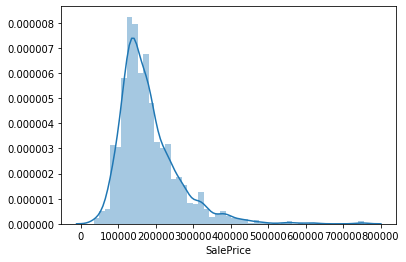

In [36]:
# target variable: SalePrice of Houses.
sns.distplot(data['SalePrice'])
plt.show()

### Data Exploration
To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.
We'll first subset the list of all (independent) numeric variables, and then make a heatmap using correlation.

In [37]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  BsmtFinSF2  \
0          4          3       4.0       3.0         706           0   
1          3          3       4.0       3.0         978           0   
2          4          3       4.0       3.0         486           0   
3          3          3       3.0       4.0         216           0   
4          4          3       4.0       3.0         655           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
0        150          856          5           1       856       854   
1        284         1262          5           1      1262         0   
2        434          920          5           1       920       866   
3        540          756          4           1       961       756   
4        490         1145          5           1      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1            4             8           0   
1             3             1            3             6           1   
2             3             1            4             6           1   
3             3             1            4             7           1   
4             4             1            4             9           1   

   FireplaceQu  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0          0.0           2         548         3.0         3.0         1.0   
1          3.0           2         460         3.0         3.0         1.0   
2          3.0           2         608         3.0         3.0         1.0   
3          4.0           3         642         3.0         3.0         1.0   
4          3.0           3         836         3.0         3.0         1.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   PoolQC  MiscVal  MoSold  YrSold  SalePrice  age  ReModAge  
0     0.0        0       2    2008     208500   16        16  
1     0.0        0       5    2007     181500   43        43  
2     0.0        0       9    2008     223500   18        17  
3     0.0        0       2    2006     140000  104        49  
4     0.0        0      12    2008     250000   19        19

In [38]:
data_numeric.shape

(1460, 48)

In [39]:
# correlation matrix
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
ExterQual        0.016178     0.165567  0.055570     0.726278    -0.138942   
ExterCond       -0.064686    -0.016430  0.014732     0.013953     0.389163   
BsmtQual         0.051122     0.141836  0.072336     0.629379    -0.164996   
BsmtCond        -0.015839     0.046888  0.031349     0.268759     0.132361   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
HeatingQC       -0.019458     0.090051  0.003581     0.457083    -0.014105   
CentralAir      -0.101774     0.067350  0.049755     0.272038     0.118969   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.004905 -0.017784    -0.183882    -0.087001   
KitchenQual     -0.012383     0.169829  0.067864     0.673331    -0.026707   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
FireplaceQu     -0.039201     0.224425  0.185332     0.490788    -0.056899   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
GarageQual      -0.072946     0.107230  0.079313     0.292399     0.019060   
GarageCond      -0.089846     0.102552  0.076097     0.286955     0.016706   
PavedDrive      -0.047611     0.082858  0.010431     0.227129    -0.073886   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180819  0.077672     0.065166    -0.001985   
PoolQC           0.014198     0.231562  0.091727     0.083690    -0.013646   
MiscVal         -0.007683    -0.000255  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   
age             -0.027850    -0.116685 -0.014228    -0.572323     0.375983   
ReModAge        -0.040581    -0.083348 -0.013788    -0.550684    -0.073741   

               MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
MSSubClass       0.023573   0.016178  -0.064686  0.051122 -0.015839   
LotFrontage      0.178469   0.165567  -0.016430  0

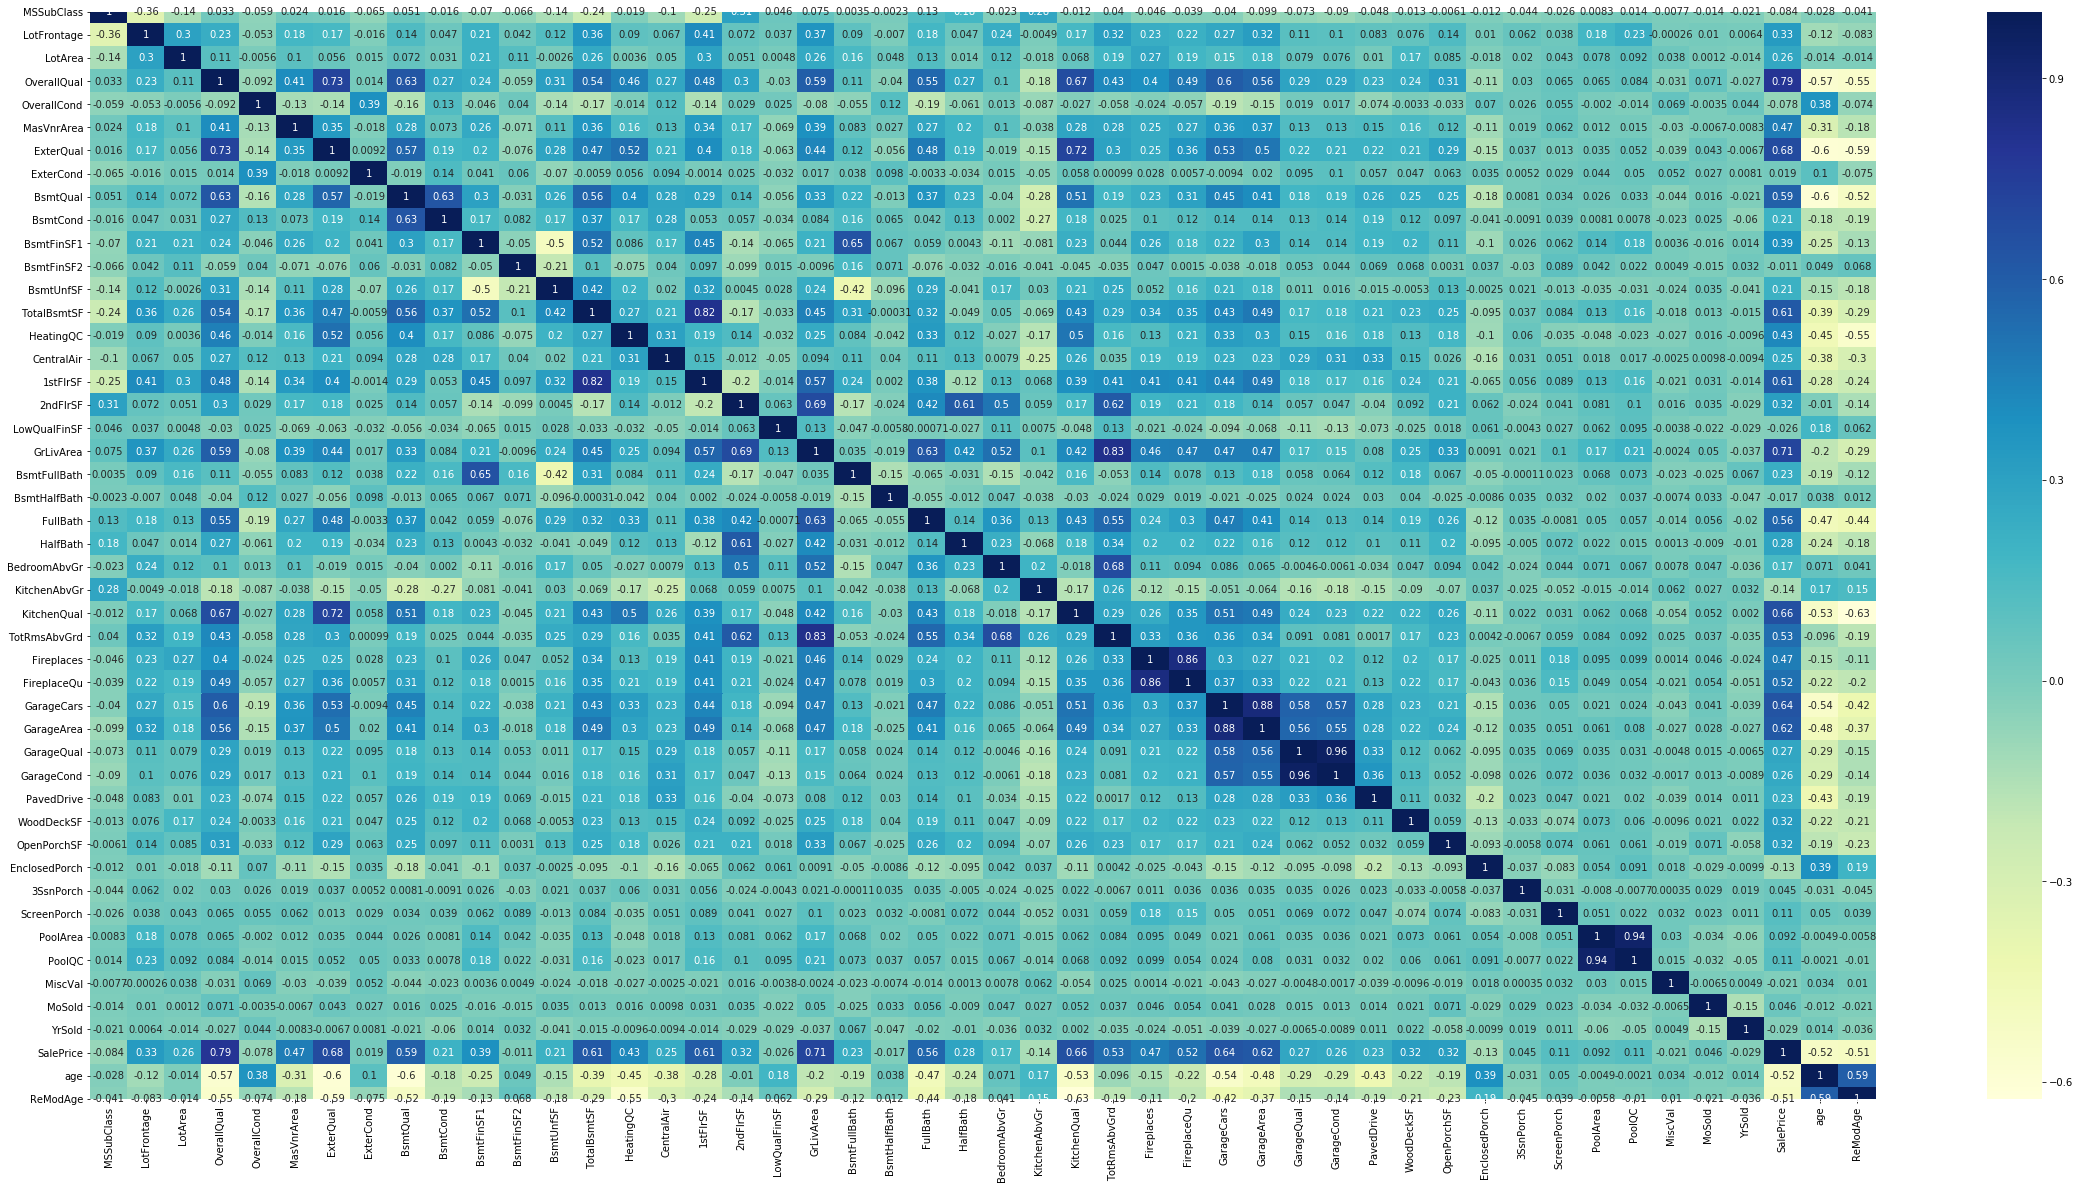

In [40]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40, 20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:

    SalePrice is highly (positively) correlated with OverallQual, ExterQual, GrLivArea, GarageCars, GarageArea, KitchenQual (notice how all of these variables represent the size/facility/overall quality of the house).

    Price is negatively correlated to age and RemodAge of the house.

Correlation among independent variables:

    Many independent variables are highly correlated (look at the light and dark blue patches).

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

In [42]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   ExterQual    ExterCond     BsmtQual     BsmtCond  \
count  1460.000000  1460.00000  1460.000000  1460.000000  1460.000000   
mean    103.117123     3.39589     3.083562     3.489041     2.934932   
std     180.731373     0.57428     0.351054     0.876478     0.552159   
min       0.000000     2.00000     1.000000     0.000000     0.000000   
25%       0.000000     3.00000     3.000000     3.000000     3.000000   
50%       0.000000     3.00000     3.000000     4.000000     3.000000   
75%     164.250000     4.00000     3.000000     4.000000     3.000000   
max    1600.000000     5.00000     5.000000     5.000000     4.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452     4.145205   
std     456.098091   161.319273   441.866955   438.705324     0.959501   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.000000   223.000000   795.750000     3.000000   
50%     383.500000     0.000000   477.500000   991.500000     5.000000   
75%     712.250000     0.000000   808.000000  1298.250000     5.000000   
max    5644.000000  1474.000000  2336.000000  6110.000000     5.000000   

        CentralAir     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      0.934932  1162.626712   346.992466      5.844521  1515.463699   
std       0.246731   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%       1.000000   882.000000     0.000000      0.000000  1129.500000   
50%       1.000000  1087.000000     0.000000      0.000000  1464.000000   
75%       1.000000  1391.250000   728.000000      0.000000  1776.750000   
max       1.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  FireplaceQu  \
count   1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean       1.046575     3.511644      6.517808     0.613014     1.825342   
std        0.220338     0.663760      1.625393     0.644666     1.810877   
min        0.000000     2.000000      2.000000     0.000000     0.000000   
25%        1.000000     3.000000      5.000000     0.000000     0.000000   
50%        1.000000     3.000000      6.000000     1.000000     2.000000   
75%        1.000000     4.000000      7.000000     1.000000     4.000000   
max        3.000000 

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [43]:
l = data.columns
l

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

In [44]:
# split into X and y
X = data.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'age', 'ReModAge']]

y = data['SalePrice']

In [45]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType Foundation BsmtExposure BsmtFinType1  \
0     VinylSd     VinylSd    BrkFace      PConc           No          GLQ   
1     MetalSd     MetalSd       None     CBlock           Gd          ALQ   
2     VinylSd     VinylSd    BrkFace      PConc           Mn          GLQ   
3     Wd Sdng     Wd Shng       None     BrkTil           No          ALQ   
4     VinylSd     VinylSd    BrkFace      PConc           Av          GLQ   

  BsmtFinType2 Heating Electrical Functional GarageType GarageFinish Fence  \
0          Unf    GasA      SBrkr        Typ     Attchd          RFn    NA   
1          Unf    GasA      SBrkr        Typ     Attchd          RFn    NA   
2          Unf    GasA      SBrkr        Typ     Attchd          RFn    NA   
3          Unf    GasA      SBrkr        Typ     Detchd          Unf    NA   
4          Unf    GasA      SBrkr        Typ     Attchd          RFn    NA   

  MiscFeature SaleType SaleCondition  
0          NA       WD        Normal  
1          NA       WD        Normal  
2          NA       WD        Normal  
3          NA       WD       Abnorml  
4          NA       WD        Normal

In [46]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

In [47]:
# Dropping all those columns whose values are NA or None as they will unnecessarily confuse
# the model.
cols = ["MasVnrType_None", "BsmtFinType1_NA", "BsmtFinType2_NA", "Electrical_NA",
        "GarageType_NA", "GarageFinish_NA", "Fence_NA", "MiscFeature_NA"]
data_dummies.drop(columns = cols, inplace = True)

In [48]:
data_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

In [49]:
data_dummies.shape

(1460, 170)

In [50]:
# drop categorical variables 
X = X.drop(list(data_categorical.columns), axis=1)

In [51]:
# concat dummy variables with X
X = pd.concat([X, data_dummies], axis=1)

In [52]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

In [53]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [54]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003124      0.006248         0.000000        0.000000      0.0001   
1       0.003124      0.006249         0.000000        0.000000       0.001   
2       0.006248      0.007653         0.003124        0.006249        0.01   
3       0.006249      0.007653         0.003124        0.006248        0.05   
4       0.006596      0.008097         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -33184.164929      -21600.382013      -22519.208595   
1   {'alpha': 0.001}      -33114.109916      -21600.146330      -22519.049890   
2    {'alpha': 0.01}      -32450.242970      -21597.809088      -22517.464769   
3    {'alpha': 0.05}      -30057.245061      -21587.829623      -22510.673579   
4     {'alpha': 0.1}      -27960.158659      -21576.200004      -22502.831413   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -22402.047297      -19477.793252    -23845.874404     4805.933130   
1      -22401.133320      -19477.589216    -23831.506326     4778.728773   
2      -22392.050339      -19475.549598    -23695.206722     4521.417082   
3      -22352.627433      -19466.599973    -23201.716240     3603.310370   
4      -22305.227894      -19457.744681    -22765.525308     2818.309590   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -12745.148051       -13118.860415   
1               27       -12746.480327       -13118.843677   
2               26       -12760.084248       -13118.677469   
3               25       -12817.103928       -13117.963162   
4               24       -12878.617157       -13117.174207   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13534.418919       -13655.433224       -12866.681167   
1       -13534.338296       -13655.397419       -12866.670219   
2       -13533.533086       -13655.073046       -12866.561100   
3       -13529.983950       -13653.972412       -12866.190255   
4       -13525.631826       -13652.649647       -12866.113340   

   mean_train_score  std_train_score  
0     -13184.108355       358.487959  
1     -13184.345988       358.139317  
2     -13186.785790       354.621895  
3     -13197.042741       340.501108  
4     -13208.037235       326.261290

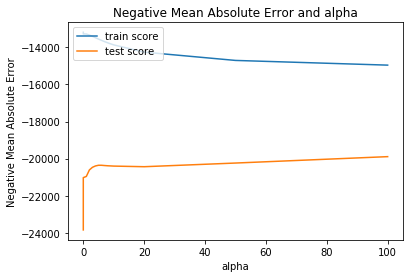

In [56]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.95268440e+03, -5.84702020e+02,  4.13404819e+03,  1.13911659e+04,
        4.35903684e+03,  4.23105032e+03,  3.24922423e+03, -8.27751926e+02,
        6.40421555e+03, -1.85417530e+03,  2.34543389e+03,  2.56814048e+02,
       -3.45173990e+02,  2.18519344e+03,  1.09659637e+03,  5.99610477e+02,
        7.50014500e+03,  1.21113238e+04, -9.70924637e+02,  1.54890501e+04,
        2.81165032e+03,  2.59470566e+02,  2.79285308e+03,  1.18479673e+03,
       -1.64170267e+03, -2.60252361e+03,  4.33149719e+03,  3.15867183e+03,
        1.05094373e+03,  1.56546315e+03,  6.69270444e+03,  7.69150068e+02,
        9.74847818e+02, -2.51420821e+03,  3.56610546e+02,  7.98288952e+02,
        9.55465067e+02,  1.88300703e+02,  1.19650605e+03,  1.33104122e+03,
       -3.57017995e+02,  1.08567496e+03,  3.09726616e+02, -6.25482658e+02,
       -6.29214601e+02, -2.45095590e+03, -9.96120130e+02,  6.95263379e+02,
        1.06652584e+03,  2.66680680e+03,  1.45661111e+03,  1.11237952e+03,
        3.29586544e+02, -

In [58]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)

In [59]:
x = list(X.columns)
y = list(ridge.coef_)

# using naive method 
# to convert lists to dictionary 
ridge_dic = {} 
for key in x: 
    for value in y: 
        ridge_dic[key] = value 
        y.remove(value) 
        break 
        
ridge_dic

{'MSSubClass': -4952.684402721928,
 'LotFrontage': -584.7020196482239,
 'LotArea': 4134.048192964743,
 'OverallQual': 11391.165932829932,
 'OverallCond': 4359.036835342301,
 'MasVnrArea': 4231.050315185277,
 'ExterQual': 3249.2242333828444,
 'ExterCond': -827.7519255770999,
 'BsmtQual': 6404.215547361596,
 'BsmtCond': -1854.1753041673705,
 'BsmtFinSF1': 2345.43389334503,
 'BsmtFinSF2': 256.8140481664455,
 'BsmtUnfSF': -345.17399048089817,
 'TotalBsmtSF': 2185.1934380010584,
 'HeatingQC': 1096.5963717514146,
 'CentralAir': 599.6104772676683,
 '1stFlrSF': 7500.144997759592,
 '2ndFlrSF': 12111.32382878828,
 'LowQualFinSF': -970.9246373705372,
 'GrLivArea': 15489.050107686828,
 'BsmtFullBath': 2811.6503239589915,
 'BsmtHalfBath': 259.4705660336759,
 'FullBath': 2792.853083885181,
 'HalfBath': 1184.7967296055808,
 'BedroomAbvGr': -1641.7026665393373,
 'KitchenAbvGr': -2602.523608915125,
 'KitchenQual': 4331.497192783438,
 'TotRmsAbvGrd': 3158.6718273464926,
 'Fireplaces': 1050.943730368106,

In [60]:
x = (sorted(ridge_dic.items(), key = lambda kv:(kv[1], kv[0])))
x

[('Condition2_PosN', -11813.168630389753),
 ('MSSubClass', -4952.684402721928),
 ('BsmtExposure_No', -4085.4226155461092),
 ('BldgType_TwnhsE', -3093.886657345808),
 ('Neighborhood_Edwards', -3079.156620231559),
 ('HouseStyle_2Story', -3017.996170998718),
 ('GarageFinish_RFn', -2949.5333637151502),
 ('BldgType_Twnhs', -2920.926021977074),
 ('MasVnrType_BrkFace', -2706.5391188509448),
 ('KitchenAbvGr', -2602.523608915125),
 ('Exterior2nd_Wd Shng', -2582.1771599844474),
 ('GarageCond', -2514.208205514036),
 ('age', -2450.9558972559694),
 ('BsmtFinType2_BLQ', -2398.8918599672224),
 ('Exterior2nd_Stucco', -2381.952379503599),
 ('LotShape_IR3', -2342.499354430115),
 ('BsmtFinType1_Unf', -2322.020958740262),
 ('BsmtFinType2_Unf', -2240.377988570648),
 ('Heating_OthW', -2095.0053471447713),
 ('GarageFinish_Unf', -2079.941179857815),
 ('RoofStyle_Gable', -2052.557849060784),
 ('Condition2_RRAe', -2036.6585470946204),
 ('Neighborhood_NAmes', -1964.551633490204),
 ('BsmtExposure_Mn', -1937.15938

## Lasso

In [61]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   11.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.093978      0.014257              0.0             0.0      0.0001   
1       0.087488      0.007648              0.0             0.0       0.001   
2       0.093721      0.009504              0.0             0.0        0.01   
3       0.090598      0.011688              0.0             0.0        0.05   
4       0.082969      0.011742              0.0             0.0         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -24602.176012      -21572.075745      -22499.331926   
1   {'alpha': 0.001}      -24602.062669      -21572.021519      -22499.397069   
2    {'alpha': 0.01}      -24600.928284      -21571.479441      -22500.049224   
3    {'alpha': 0.05}      -24595.882295      -21569.076114      -22502.944329   
4     {'alpha': 0.1}      -24589.572770      -21566.085841      -22506.563686   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -22195.913142      -19489.421951    -22074.262102     1645.446749   
1      -22196.117329      -19489.060921    -22074.210188     1645.534798   
2      -22198.158883      -19485.450636    -22073.690977     1646.415944   
3      -22207.234180      -19480.568863    -22073.613968     1646.836289   
4      -22218.579298      -19479.402552    -22074.506581     1645.829530   

   rank_test_score  split0_train_score  split1_train_score  \
0               24       -12998.114957       -13117.812704   
1               23       -12998.117395       -13117.809634   
2               22       -12998.141939       -13117.780618   
3               21       -12998.257739       -13117.655193   
4               25       -12998.411529       -13117.512111   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13534.458218       -13656.104435       -12866.644639   
1       -13534.454367       -13656.099348       -12866.642003   
2       -13534.417105       -13656.056137       -12866.618670   
3       -13534.254468       -13655.888095       -12866.519020   
4       -13534.054114       -13655.680359       -12866.404043   

   mean_train_score  std_train_score  
0     -13234.626991       307.420407  
1     -13234.624549       307.418750  
2     -13234.602894       307.403648  
3     -13234.514903       307.341433  
4     -13234.412431       307.260179

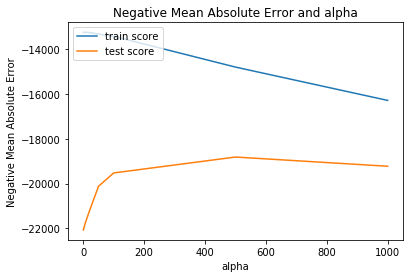

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [64]:
alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lasso.coef_

array([-7.53717595e+03,  0.00000000e+00,  3.60995106e+03,  1.29320651e+04,
        4.25475075e+03,  3.41834988e+03,  3.86015420e+03, -0.00000000e+00,
        4.68027519e+03, -9.96163711e+02,  3.46755496e+03,  0.00000000e+00,
       -0.00000000e+00,  3.40047591e+02,  4.50697787e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.58696071e+03,  3.31205981e+04,
        2.65834754e+03,  0.00000000e+00,  6.06062561e+02,  0.00000000e+00,
       -1.49965203e+03, -2.02255391e+03,  4.45212267e+03,  0.00000000e+00,
        4.77223019e+02,  1.15894159e+03,  5.91436252e+03,  0.00000000e+00,
       -0.00000000e+00, -1.01986302e+03,  0.00000000e+00,  4.05549350e+02,
        4.11168222e+02, -0.00000000e+00,  6.06082985e+02,  6.34950161e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.36730071e+02,
       -0.00000000e+00, -3.55937338e+03, -1.06877999e+03,  0.00000000e+00,
        2.70219356e+01,  1.40627996e+03, -0.00000000e+00,  6.20252936e+02,
        0.00000000e+00, -

In [66]:
# Combining columns and coef to make a dictionary.
x = list(X.columns)
y = list(lasso.coef_)

# using naive method 
# to convert lists to dictionary 
lasso_dic = {} 
for key in x: 
    for value in y: 
        lasso_dic[key] = value 
        y.remove(value) 
        break 
        
lasso_dic

{'MSSubClass': -7537.175954852606,
 'LotFrontage': 0.0,
 'LotArea': 3609.9510550677887,
 'OverallQual': 12932.065111093549,
 'OverallCond': 4254.750748894186,
 'MasVnrArea': 3418.3498790308413,
 'ExterQual': 3860.1541954383747,
 'ExterCond': -0.0,
 'BsmtQual': 4680.275187488289,
 'BsmtCond': -996.1637112192132,
 'BsmtFinSF1': 3467.554958454118,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 340.04759056829033,
 'HeatingQC': 450.69778721473466,
 'CentralAir': 0.0,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': -1586.9607143172066,
 'GrLivArea': 33120.59813100325,
 'BsmtFullBath': 2658.3475352598816,
 'BsmtHalfBath': 0.0,
 'FullBath': 606.0625606879023,
 'HalfBath': 0.0,
 'BedroomAbvGr': -1499.6520310532037,
 'KitchenAbvGr': -2022.553912742456,
 'KitchenQual': 4452.122668319162,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 477.22301925935164,
 'FireplaceQu': 1158.9415916777896,
 'GarageCars': 5914.362518927856,
 'GarageArea': 0.0,
 'GarageQual': -0.0,
 'GarageCond': -1019.86301813

In [67]:
# Sorting the dictionary w.r.t the coefficients so that most important coefficients can be found.
x = (sorted(lasso_dic.items(), key = lambda kv:(kv[1], kv[0])))
x

[('Condition2_PosN', -12475.254326845261),
 ('MSSubClass', -7537.175954852606),
 ('BsmtExposure_No', -3683.686891331905),
 ('age', -3559.3733757681944),
 ('GarageFinish_RFn', -2544.4199153731574),
 ('BsmtFinType1_Unf', -2216.605668564225),
 ('KitchenAbvGr', -2022.553912742456),
 ('Exterior2nd_Wd Shng', -1868.0149133394623),
 ('Heating_OthW', -1806.9734590161024),
 ('Exterior2nd_Stucco', -1624.462279131335),
 ('LowQualFinSF', -1586.9607143172066),
 ('GarageFinish_Unf', -1580.8395770383029),
 ('MasVnrType_BrkFace', -1561.0203441918284),
 ('RoofStyle_Gable', -1501.1648338620075),
 ('BedroomAbvGr', -1499.6520310532037),
 ('LotShape_IR3', -1471.4055583755214),
 ('Neighborhood_Edwards', -1410.8306460209512),
 ('Functional_Sev', -1320.6212841402562),
 ('Condition1_Feedr', -1087.3016345442318),
 ('ReModAge', -1068.7799945454756),
 ('BldgType_Twnhs', -1031.387064971763),
 ('GarageCond', -1019.8630181339266),
 ('BsmtCond', -996.1637112192132),
 ('Exterior1st_Plywood', -988.760410517655),
 ('Bsmt

### Lambda Values of Ridge and Lasso Regression and which one is better?

The Lambda value of Ridge is 50 and Lasso is 500. I will prefer to use Lasso as it minimizes many coefficients to 0. It will help us in reducing the number of features and simplification of the model. I tuned the value of alpha many times and found that 500 is the good value for lasso regression.

### Significant Variables for predicting the price of variable
#### Positive Variables that will raise the price of a property.
1. GrLivArea
2. RoofMatl
3. OverallQual
4. Neighborhood
5. GarageCars

The above factors are the top ones which has high coefficient values using lasso. Ground floor living area is the topmost feature while roof material, neighborhood, number of cars garage can hold, basement's exposure and quality, kitchen quality with overall good condition. Also SaleType for a newly constructed home makes the value of home on a higher side. Overall quality can be pushed using pictures of the property on the website or the sales person can stress on the quality while showing the property to the client.

#### Negative Variables that will reduce the price of a property.
1. Condition2_PosN
2. MSSubClass
3. BsmtExposure_No
4. age
5. GarageFinish_RFn

The above factors negatively affect the price of the property. If a property is besides green belt its a negative factor. The Classing which was done on data actually affects negatively on the sale price of the property. Also the age of the house and the ventillation in basement and non finished garage are the factors that makes property worth less. 

# Building a Model

Lets try building a model based on lassoCV and get the best variables for predicting the price of the propery. This also eliminates lot of features which are of no use in prediction.

In [68]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 1454.312530
Best score using built-in LassoCV: 0.877734


In [69]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 58 variables and eliminated the other 159 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

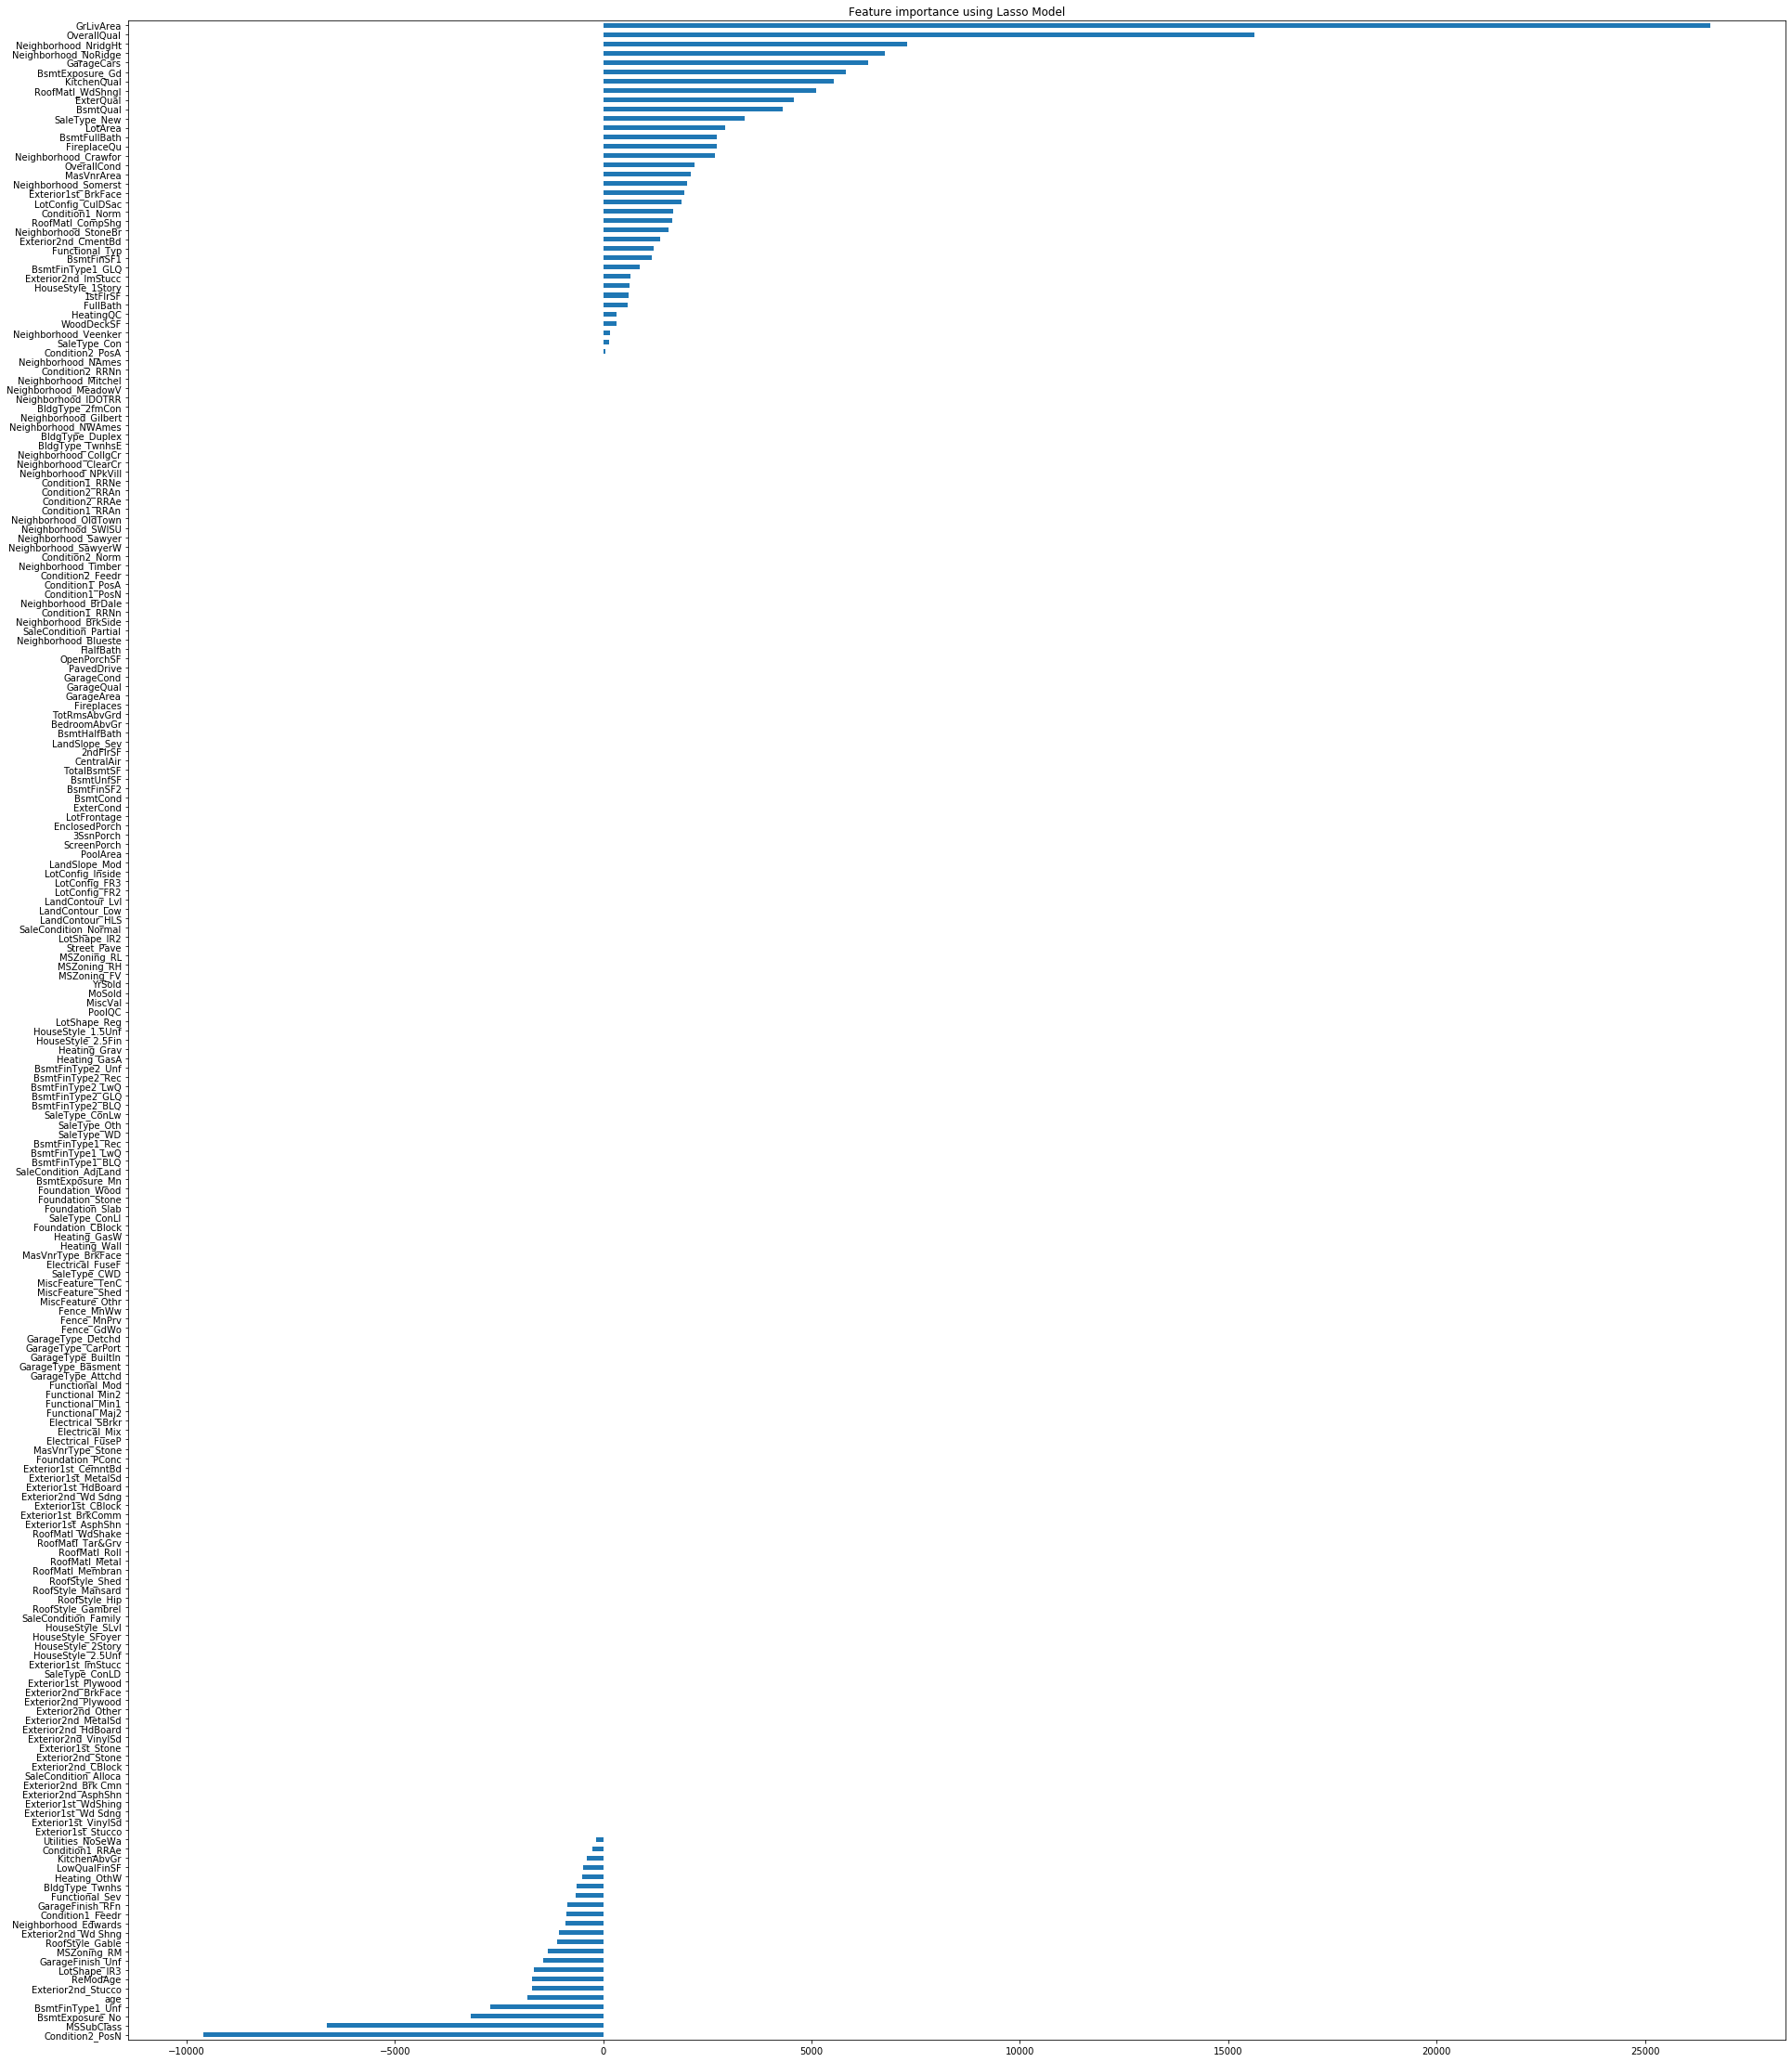

In [70]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (32, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")